In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error

Загрузим файл с данными о потреблении электроэнергии

In [2]:
#Path_Energy = 'PJME_hourly.csv'
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


C:\Users\Fujitsu\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


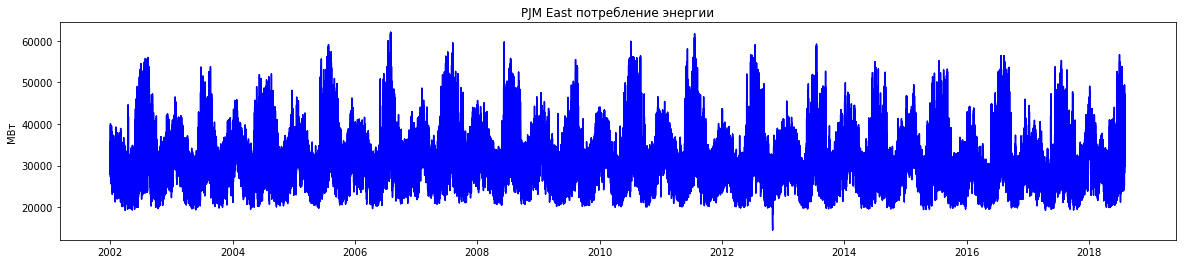

In [3]:
plt.figure(figsize =(20,4))
plt.plot( data.index, data['PJME_MW'], 'b' )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

Сделаем ресемплинг (среднее по неделям)

In [4]:
data_w = data.copy().resample('w').mean()
data_w.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,3.517483,1.0,3.517483,1.0,3.517483,11.58042,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1.000000,10.000000,1.0,10.000000,2.0,3.000000,11.50000,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1.000000,17.000000,1.0,17.000000,3.0,3.000000,11.50000,0.000000,0.142857,0.000000
2002-01-27,30141.529762,2002.0,1.000000,24.000000,1.0,24.000000,4.0,3.000000,11.50000,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2002.0,1.428571,17.714286,1.0,31.000000,5.0,3.000000,11.50000,0.000000,0.000000,0.000000


Как видно из полученных данных, необходимо исправить информацию в столбцах 'month', 'dayofmonth', 'dayofyear', 'dayofweek'.

In [5]:
#
data_w['month']=data_w.index.month
data_w['dayofmonth'] = data_w.index.day
data_w['dayofyear'] = data_w.index.dayofyear
data_w['dayofweek'] = data_w.index.dayofweek

In [6]:
data_w.head(25)

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1,6,1.0,6,1.0,6,11.580420,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1,13,1.0,13,2.0,6,11.500000,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1,20,1.0,20,3.0,6,11.500000,0.000000,0.142857,0.000000
2002-01-27,30141.529762,2002.0,1,27,1.0,27,4.0,6,11.500000,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2002.0,2,3,1.0,34,5.0,6,11.500000,0.000000,0.000000,0.000000
2002-02-10,31150.517857,2002.0,2,10,1.0,41,6.0,6,11.500000,0.000000,0.000000,0.000000
2002-02-17,30616.565476,2002.0,2,17,1.0,48,7.0,6,11.500000,0.000000,0.142857,0.000000
2002-02-24,29144.130952,2002.0,2,24,1.0,55,8.0,6,11.500000,0.142857,0.000000,0.142857
2002-03-03,29869.011905,2002.0,3,3,1.0,62,9.0,6,11.500000,0.000000,0.000000,0.000000


In [7]:
data_w.drop('hour', axis=1,inplace=True)
data_w.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1,6,1.0,6,1.0,6,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1,13,1.0,13,2.0,6,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1,20,1.0,20,3.0,6,0.000000,0.142857,0.000000
2002-01-27,30141.529762,2002.0,1,27,1.0,27,4.0,6,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2002.0,2,3,1.0,34,5.0,6,0.000000,0.000000,0.000000


анализ показывает, что без потери информации можно исключить столбцы 'year' 'dayofweek'

In [8]:
data_w.drop('year', axis=1,inplace=True)
data_w.drop('dayofweek', axis=1,inplace=True)
data_w.head()

,PJME_MW,month,dayofmonth,quarter,dayofyear,weekofyear,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,
2002-01-06,32392.160839,1,6,1.0,6,1.0,0.160839,0.000000,0.167832
2002-01-13,31487.386905,1,13,1.0,13,2.0,0.000000,0.000000,0.000000
2002-01-20,31452.880952,1,20,1.0,20,3.0,0.000000,0.142857,0.000000
2002-01-27,30141.529762,1,27,1.0,27,4.0,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2,3,1.0,34,5.0,0.000000,0.000000,0.000000


In [9]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from datetime import timedelta
one_day = timedelta(days=1)
cal = calendar()
#инициализировали объект календарь
data_w['is_holiday'] = data_w.index.get_level_values('Date').isin([d.date() for d in cal.holidays()])
data_w['is_prev_holiday'] = data_w.index.get_level_values('Date').isin([( d.date() - one_day ) for d in cal.holidays()])
data_w['is_next_holiday'] = data_w.index.get_level_values('Date').isin([( d.date() + one_day ) for d in cal.holidays()])
data_w['is_holiday'] = data_w['is_holiday'].astype('uint8')
data_w['is_prev_holiday'] = data_w['is_prev_holiday'].astype('uint8')
data_w['is_next_holiday'] = data_w['is_next_holiday'].astype('uint8')

In [10]:
data_w.head(10)

,PJME_MW,month,dayofmonth,quarter,dayofyear,weekofyear,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,
2002-01-06,32392.160839,1,6,1.0,6,1.0,0,0,0
2002-01-13,31487.386905,1,13,1.0,13,2.0,0,0,0
2002-01-20,31452.880952,1,20,1.0,20,3.0,0,1,0
2002-01-27,30141.529762,1,27,1.0,27,4.0,0,0,0
2002-02-03,29196.488095,2,3,1.0,34,5.0,0,0,0
2002-02-10,31150.517857,2,10,1.0,41,6.0,0,0,0
2002-02-17,30616.565476,2,17,1.0,48,7.0,0,1,0
2002-02-24,29144.130952,2,24,1.0,55,8.0,0,0,0
2002-03-03,29869.011905,3,3,1.0,62,9.0,0,0,0


In [11]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE 
import seaborn as sns

scl=StandardScaler()
tsne_ =TSNE(n_components=2)

X = data_w.iloc[:,:-1].values

Xscale = scl.fit_transform(X)
X_t = tsne_.fit_transform(Xscale)

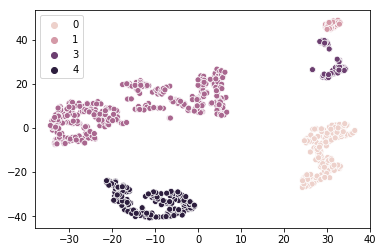

In [12]:
clast_0 = DBSCAN(eps=5, leaf_size=15 )
clast_1 = DBSCAN(eps=2, leaf_size=5)
X_clast =clast_0.fit_predict(X_t)
X_scale_clast =clast_1.fit_predict(Xscale)

sns.scatterplot(X_t[:,0],X_t[:,1], hue=X_clast)
plt.show()

In [13]:
print('Число кластеров в календаре с масштабированием: ',len(np.unique(X_scale_clast)))
print('Число кластеров в календаре: ',len(np.unique(X_clast)))

Число кластеров в календаре с масштабированием:  4
Число кластеров в календаре:  5


In [14]:
data_w['day_week_month'] = X_clast
data_w.iloc[np.where(data_w['day_week_month']==0)[0]].iloc[:10,:]

,PJME_MW,month,dayofmonth,quarter,dayofyear,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,day_week_month
Date,,,,,,,,,,
2002-01-06,32392.160839,1,6,1.0,6,1.0,0,0,0,0
2002-01-13,31487.386905,1,13,1.0,13,2.0,0,0,0,0
2002-01-27,30141.529762,1,27,1.0,27,4.0,0,0,0,0
2002-02-03,29196.488095,2,3,1.0,34,5.0,0,0,0,0
2002-02-10,31150.517857,2,10,1.0,41,6.0,0,0,0,0
2002-02-24,29144.130952,2,24,1.0,55,8.0,0,0,0,0
2002-03-03,29869.011905,3,3,1.0,62,9.0,0,0,0,0
2002-03-10,29440.910714,3,10,1.0,69,10.0,0,0,0,0
2002-03-17,28672.779762,3,17,1.0,76,11.0,0,0,0,0


In [15]:
data_w.iloc[np.where(data_w['day_week_month']==2)[0]].iloc[:10,:]

,PJME_MW,month,dayofmonth,quarter,dayofyear,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,day_week_month
Date,,,,,,,,,,
2002-04-07,28308.778443,4,7,2.0,97,14.0,0,0,0,2
2002-04-14,27182.482143,4,14,2.0,104,15.0,0,0,0,2
2002-04-21,31484.488095,4,21,2.0,111,16.0,0,0,0,2
2002-04-28,27316.886905,4,28,2.0,118,17.0,0,0,0,2
2002-05-05,26929.482143,5,5,2.0,125,18.0,0,0,0,2
2002-05-12,27587.095238,5,12,2.0,132,19.0,0,0,0,2
2002-05-19,27606.833333,5,19,2.0,139,20.0,0,0,0,2
2002-06-02,31448.660714,6,2,2.0,153,22.0,0,0,0,2
2002-06-09,30961.797619,6,9,2.0,160,23.0,0,0,0,2


In [16]:
data_w.head()

,PJME_MW,month,dayofmonth,quarter,dayofyear,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,day_week_month
Date,,,,,,,,,,
2002-01-06,32392.160839,1,6,1.0,6,1.0,0,0,0,0
2002-01-13,31487.386905,1,13,1.0,13,2.0,0,0,0,0
2002-01-20,31452.880952,1,20,1.0,20,3.0,0,1,0,1
2002-01-27,30141.529762,1,27,1.0,27,4.0,0,0,0,0
2002-02-03,29196.488095,2,3,1.0,34,5.0,0,0,0,0


In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
Xpca=pca.fit_transform(Xscale[:,1:])
Xpca.shape

(866, 2)

In [18]:
data_w['pca1']=Xpca[:,0]
data_w['pca2']=Xpca[:,1]

In [19]:
first_diff =np.array(data_w.iloc[1:,0].values - data_w.iloc[:-1,0].values).astype('float32') 
data_w['diff1'] = 0
data_w['diff1'] =  data_w['diff1'].astype('float') 
data_w['diff1'].values[1:] = first_diff

In [20]:
first_diff_w =(first_diff) / data_w.iloc[1:,0].values
data_w['diff1_d'] = 0
data_w['diff1_d'] =  data_w['diff1_d'].astype('float') 
data_w['diff1_d'].values[1:] = np.array(first_diff_w).astype('float32')

In [21]:
first_diff_l =np.log(data_w.iloc[1:,0].values) 
data_w['diff1_l'] = 0
data_w['diff1_l'] =  data_w['diff1_l'].astype('float') 
data_w['diff1_l'].values[1:] = first_diff_l

In [22]:
data_w['w_1m']=data_w['PJME_MW'].rolling(window=4).mean()

In [23]:
def exponential_smoothing(series, alpha):
    result = [series[0]] 
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

data_w['exp_0_05'] = exponential_smoothing(data_w['PJME_MW'], 0.05)

In [51]:
data_w.iloc[0:15,:]

,PJME_MW,month,dayofmonth,quarter,dayofyear,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,day_week_month,pca1,pca2,diff1,diff1_d,diff1_l,w_1m,exp_0_05
Date,,,,,,,,,,,,,,,,,
2002-01-06,32392.160839,1,6,1.0,6,1.0,0,0,0,0,-3.159825,0.551383,0.000000,0.000000,0.000000,NaN,32392.160839
2002-01-13,31487.386905,1,13,1.0,13,2.0,0,0,0,0,-3.066659,-0.091214,-904.773926,-0.028734,10.357342,NaN,32346.922142
2002-01-20,31452.880952,1,20,1.0,20,3.0,0,1,0,1,-3.059097,1.081268,-34.505951,-0.001097,10.356246,NaN,32302.220083
2002-01-27,30141.529762,1,27,1.0,27,4.0,0,0,0,0,-2.880328,-1.376408,-1311.351196,-0.043506,10.313659,31368.489615,32194.185567
2002-02-03,29196.488095,2,3,1.0,34,5.0,0,0,0,0,-2.758544,0.834910,-945.041687,-0.032368,10.281804,30569.571429,32044.300693
2002-02-10,31150.517857,2,10,1.0,41,6.0,0,0,0,0,-2.665378,0.192313,1954.029785,0.062729,10.346586,30485.354167,31999.611551
2002-02-17,30616.565476,2,17,1.0,48,7.0,0,1,0,1,-2.657816,1.364795,-533.952393,-0.017440,10.329296,30276.275298,31930.459248
2002-02-24,29144.130952,2,24,1.0,55,8.0,0,0,0,0,-2.479046,-1.092881,-1472.434570,-0.050523,10.280009,30026.925595,31791.142833
2002-03-03,29869.011905,3,3,1.0,62,9.0,0,0,0,0,-2.345890,0.843277,724.880981,0.024269,10.304577,30195.056548,31695.036287


In [53]:
data_w.iloc[:3,15]=0
data_w.iloc[0:8,:]

,PJME_MW,month,dayofmonth,quarter,dayofyear,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,day_week_month,pca1,pca2,diff1,diff1_d,diff1_l,w_1m,exp_0_05
Date,,,,,,,,,,,,,,,,,
2002-01-06,32392.160839,1,6,1.0,6,1.0,0,0,0,0,-3.159825,0.551383,0.000000,0.000000,0.000000,0.000000,32392.160839
2002-01-13,31487.386905,1,13,1.0,13,2.0,0,0,0,0,-3.066659,-0.091214,-904.773926,-0.028734,10.357342,0.000000,32346.922142
2002-01-20,31452.880952,1,20,1.0,20,3.0,0,1,0,1,-3.059097,1.081268,-34.505951,-0.001097,10.356246,0.000000,32302.220083
2002-01-27,30141.529762,1,27,1.0,27,4.0,0,0,0,0,-2.880328,-1.376408,-1311.351196,-0.043506,10.313659,31368.489615,32194.185567
2002-02-03,29196.488095,2,3,1.0,34,5.0,0,0,0,0,-2.758544,0.834910,-945.041687,-0.032368,10.281804,30569.571429,32044.300693
2002-02-10,31150.517857,2,10,1.0,41,6.0,0,0,0,0,-2.665378,0.192313,1954.029785,0.062729,10.346586,30485.354167,31999.611551
2002-02-17,30616.565476,2,17,1.0,48,7.0,0,1,0,1,-2.657816,1.364795,-533.952393,-0.017440,10.329296,30276.275298,31930.459248
2002-02-24,29144.130952,2,24,1.0,55,8.0,0,0,0,0,-2.479046,-1.092881,-1472.434570,-0.050523,10.280009,30026.925595,31791.142833


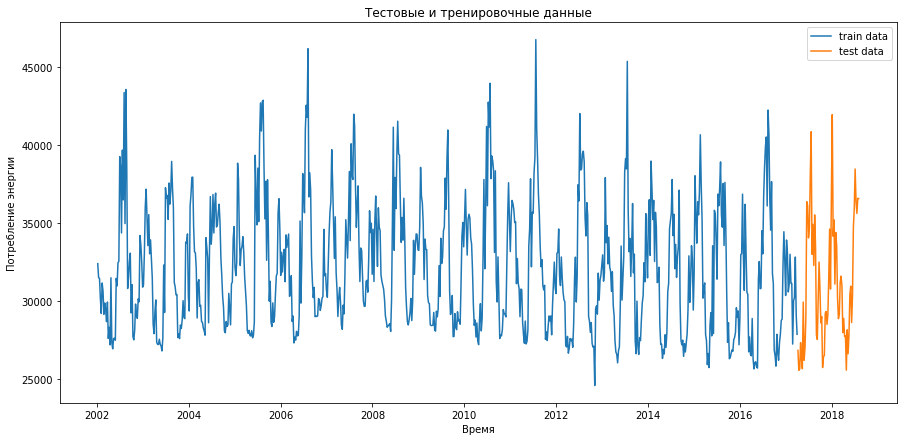

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
scl =StandardScaler()
scly =StandardScaler()

# сделаем примеры и модель 
def split_data_e( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

train_e, test_e = split_data_e( data_w, '04-02-2017')

X_train_e = train_e.iloc[:-1,:]
y_train_e = train_e[data_w.columns[0]].values[1:]
X_test_e = test_e.iloc[:-1,:]
y_test_e = test_e[data_w.columns[0]].values[1:]


plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии')
plt.plot(train_e.index.get_level_values('Date'),train_e[data_w.columns[0]], label='train data' )
plt.plot(test_e.index.get_level_values('Date'),test_e[data_w.columns[0]], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

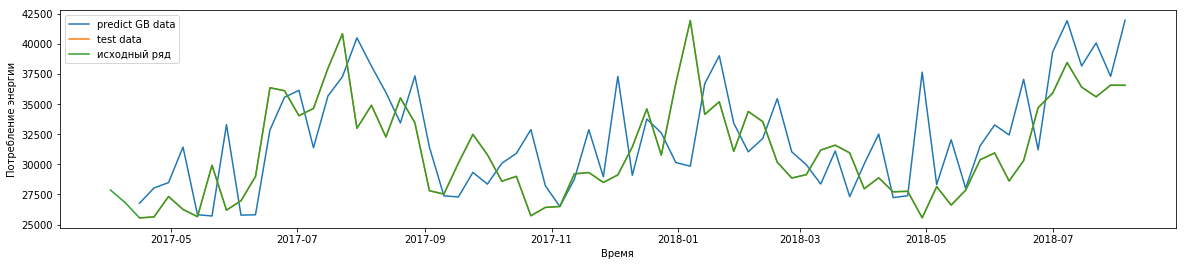

ошибка градиентного бустинга :   9.898939651281541 %


In [55]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

model_gb = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)
model_gb.fit( X_train_e, y_train_e ) 
X_test_pred_gb = model_gb.predict(X_test_e)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('Потребление энергии')
plt.plot(test_e.index[1:],X_test_pred_gb, label='predict GB data' )
plt.plot(test_e.index[1:],y_test_e, label='test data')
plt.plot(data_w.loc['04-02-2017':].index, data_w.loc['04-02-2017':]['PJME_MW'], label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_e, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

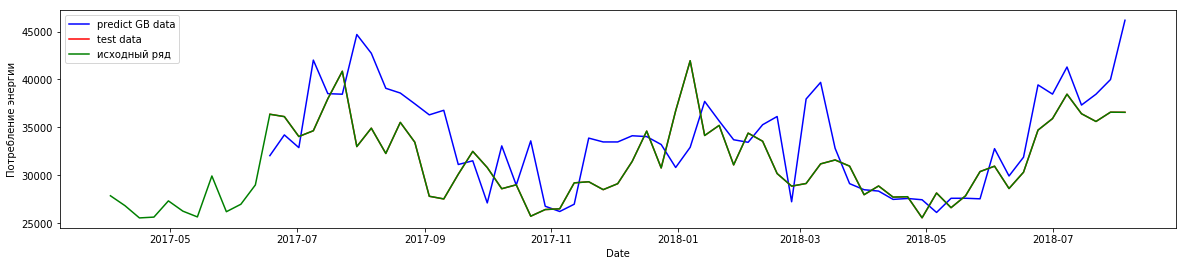

ошибка градиентного бустинга :   10.590250936315329 %


In [61]:
h=10
X_train_e = train_e.iloc[:-h,:]
y_train_e = train_e[data_w.columns[0]].values[h:]
X_test_e = test_e.iloc[:-h,:]
y_test_e = test_e[data_w.columns[0]].values[h:]

model_gb.fit( X_train_e, y_train_e ) 
X_test_pred_gb = model_gb.predict(X_test_e)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Date')
plt.ylabel('Потребление энергии')
plt.plot(test_e.index[h:],X_test_pred_gb, color = 'blue', label='predict GB data' )
plt.plot(test_e.index[h:],y_test_e, color = 'red', label='test data')
plt.plot(data_w.loc['04-02-2017':].index, data_w.loc['04-02-2017':]['PJME_MW'], color = 'green', label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_e, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

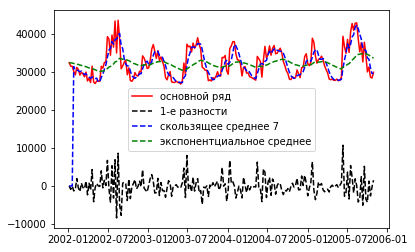

In [65]:
N100=200
plt.plot(data_w.index[:N100],data_w['PJME_MW'][:N100],'r',label ='основной ряд')
plt.plot(data_w.index[:N100],data_w['diff1'][:N100],'--k',label ='1-е разности')
plt.plot(data_w.index[:N100],data_w['w_1m'][:N100],'--b',label ='скользящее среднее 7')
plt.plot(data_w.index[:N100],data_w['exp_0_05'][:N100],'--g',label ='экспонентциальное среднее')
plt.legend()
plt.show()

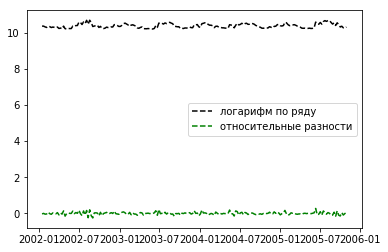

In [67]:
N100=200
plt.plot(data_w.index[1:N100],data_w['diff1_l'][1:N100],'--k',label ='логарифм по ряду')

plt.plot(data_w.index[1:N100],data_w['diff1_d'][1:N100],'--g',label ='относительные разности')
plt.legend()
plt.show()

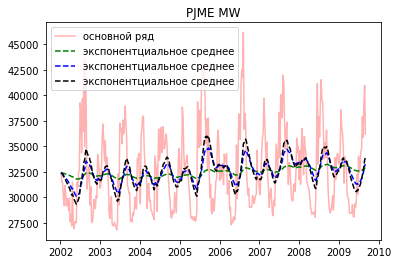

In [68]:
data_w['exp_0_01'] = exponential_smoothing(data_w['PJME_MW'], 0.01)
data_w['exp_0_03'] = exponential_smoothing(data_w['PJME_MW'], 0.03)
data_w['exp_0_04'] = exponential_smoothing(data_w['PJME_MW'], 0.04)
data_w['exp_0_06'] = exponential_smoothing(data_w['PJME_MW'], 0.06)
data_w['exp_0_07'] = exponential_smoothing(data_w['PJME_MW'], 0.07)
data_w['exp_0_08'] = exponential_smoothing(data_w['PJME_MW'], 0.08)

N100=400
plt.plot(data_w.index[:N100],data_w['PJME_MW'][:N100],'r',label ='основной ряд',alpha=0.3)
plt.plot(data_w.index[:N100],data_w['exp_0_01'][:N100],'--g',label ='экспонентциальное среднее')
plt.plot(data_w.index[:N100],data_w['exp_0_05'][:N100],'--b',label ='экспонентциальное среднее')
plt.plot(data_w.index[:N100],data_w['exp_0_08'][:N100],'--k',label ='экспонентциальное среднее')
plt.legend()
plt.title('PJME MW')
plt.show()

In [69]:
p = 7
for i in range(p):
    data_w['t'+str(p-i)]=0
    data_w['t'+str(p-i)].values[p:] = data_w['PJME_MW'].values[i:-(p)+i]

In [70]:
p = 7
for i in range(p):
    data_w['d'+str(p-i)]=0
    data_w['d'+str(p-i)].values[p:] = data_w['diff1'].values[i:-(p)+i]


In [71]:
data_w.head(10)

,PJME_MW,month,dayofmonth,quarter,dayofyear,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,day_week_month,...,t3,t2,t1,d7,d6,d5,d4,d3,d2,d1
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-06,32392.160839,1,6,1.0,6,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2002-01-13,31487.386905,1,13,1.0,13,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2002-01-20,31452.880952,1,20,1.0,20,3.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2002-01-27,30141.529762,1,27,1.0,27,4.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2002-02-03,29196.488095,2,3,1.0,34,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2002-02-10,31150.517857,2,10,1.0,41,6.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2002-02-17,30616.565476,2,17,1.0,48,7.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2002-02-24,29144.130952,2,24,1.0,55,8.0,0,0,0,0,...,29196,31150,30616,0,-904,-34,-1311,-945,1954,-533
2002-03-03,29869.011905,3,3,1.0,62,9.0,0,0,0,0,...,31150,30616,29144,-904,-34,-1311,-945,1954,-533,-1472


In [72]:
scl_target=StandardScaler() 

h=1
target = data_w['PJME_MW'].values[h+p:].reshape((data_w.shape[0]-h-p,1))
y = scl_target.fit_transform(target)
y.shape

(858, 1)

In [83]:
scl_x=StandardScaler() 

X = data_w.iloc[p:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape


(858, 37)

In [85]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import f_regression, mutual_info_regression

f_test, _ = f_regression(X, y.ravel())
f_test /= np.max(f_test)
for i in range(X.shape[1]):
    print("F-test={:.2f},  I={}".format(f_test[i],i))

F-test=nan,  I=0
F-test=nan,  I=1
F-test=nan,  I=2
F-test=nan,  I=3
F-test=nan,  I=4
F-test=nan,  I=5
F-test=nan,  I=6
F-test=nan,  I=7
F-test=nan,  I=8
F-test=nan,  I=9
F-test=nan,  I=10
F-test=nan,  I=11
F-test=nan,  I=12
F-test=nan,  I=13
F-test=nan,  I=14
F-test=nan,  I=15
F-test=nan,  I=16
F-test=nan,  I=17
F-test=nan,  I=18
F-test=nan,  I=19
F-test=nan,  I=20
F-test=nan,  I=21
F-test=nan,  I=22
F-test=nan,  I=23
F-test=nan,  I=24
F-test=nan,  I=25
F-test=nan,  I=26
F-test=nan,  I=27
F-test=nan,  I=28
F-test=nan,  I=29
F-test=nan,  I=30
F-test=nan,  I=31
F-test=nan,  I=32
F-test=nan,  I=33
F-test=nan,  I=34
F-test=nan,  I=35
F-test=nan,  I=36


C:\Users\Fujitsu\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Fujitsu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Fujitsu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Fujitsu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
